In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loader.ImageLoader import ImageLoader
from visualizer.image_visualization import print_grayscale, print_rgb
from denoiser.Denoiser import ImageDenoiser
import numpy as np
import matplotlib.pyplot as plt

In [3]:
loader = ImageLoader("cameraman.jpg", noise="S&P", rescale_factor=None)

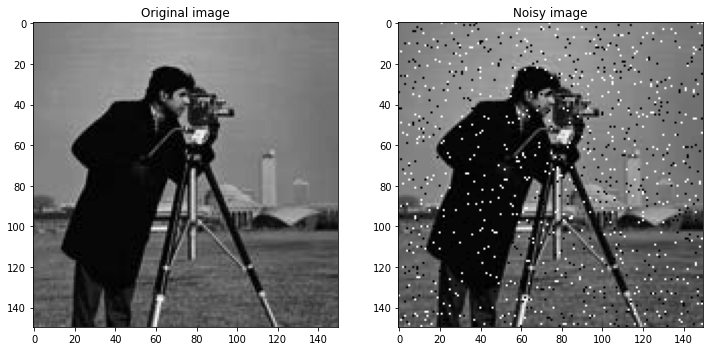

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.imshow(loader.grayscale(), cmap='gray')
ax1.set_title("Original image")
ax2.imshow(loader.noisy_image(), cmap='gray')
ax2.set_title("Noisy image")
plt.show()

In [5]:
graph = loader.graph()
print(list(graph.edges())[1])

The graph had not been built before. Wait until its created...
((0, 0), (1, 0))


In [6]:
denoiser = ImageDenoiser(graph, loader.noisy_image(), data_fitting_type="L1", regularization_weight=1)

In [7]:
Energy_history, Steps = denoiser.alpha_beta_swap(max_iter=2000)

Start energy : 1789112


100%|██████████| 2000/2000 [07:16<00:00,  4.58it/s]

End energy : 1341360


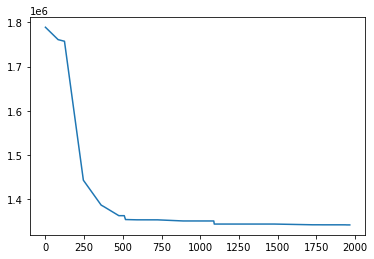

In [8]:
plt.plot(Steps, Energy_history)

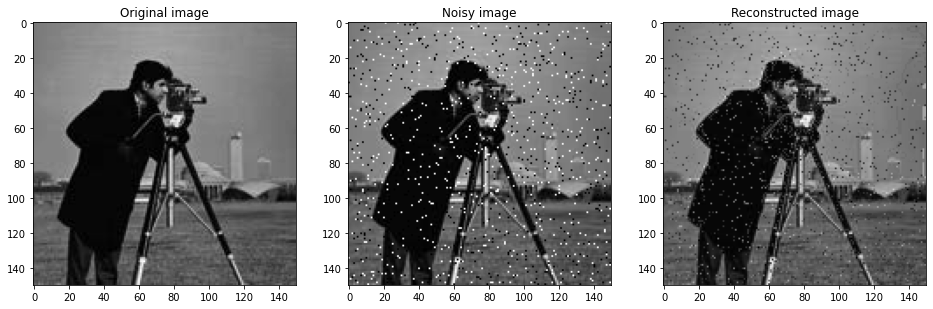

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8))
ax1.imshow(loader.grayscale(), cmap='gray')
ax1.set_title("Original image")
ax2.imshow(loader.noisy_image(), cmap='gray')
ax2.set_title("Noisy image")
ax3.imshow(denoiser.reconstructed_image, cmap='gray')
ax3.set_title("Reconstructed image")
plt.show()